Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

boston = load_boston()

In [2]:
data = boston.data
target = boston.target
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

In [14]:
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [12]:
from sklearn.manifold import TSNE

In [36]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [37]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


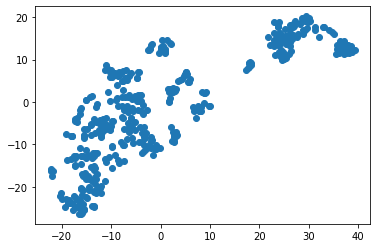

In [19]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [50]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [51]:
train_labels = model.fit_predict(X_train_scaled)

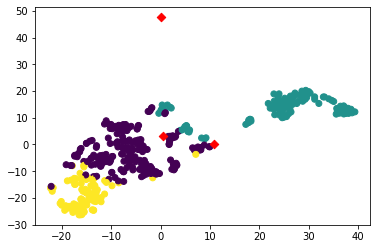

In [57]:
centers = ss.inverse_transform(model.cluster_centers_)

plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

In [53]:
model.inertia_

2820.517707291972

In [66]:
y_train[train_labels == 0].mean()

price    24.958115
dtype: float64

In [67]:
X_train[train_labels == 0]["CRIM"].mean()

0.42166020942408367

In [68]:
y_train[train_labels == 1].mean()

price    16.165354
dtype: float64

In [69]:
X_train[train_labels == 1]["CRIM"].mean()

10.797028425196853

In [70]:
y_train[train_labels == 2].mean()

price    27.788372
dtype: float64

In [71]:
X_train[train_labels == 2]["CRIM"].mean()

0.07356558139534886

*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [73]:
test_labels = model.fit_predict(X_test_scaled)

In [74]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

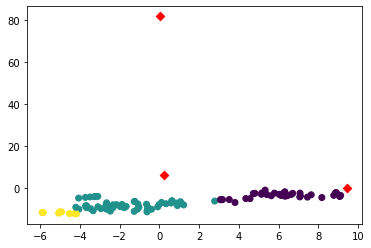

In [76]:
centers = ss.inverse_transform(model.cluster_centers_)

plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

In [77]:
y_test[train_labels == 0].mean()

price    16.710526
dtype: float64

In [78]:
X_test[train_labels == 0]["CRIM"].mean()

9.419181842105264

In [79]:
y_test[train_labels == 1].mean()

price    22.690909
dtype: float64

In [80]:
X_test[train_labels == 1]["CRIM"].mean()

0.21929690909090907

In [81]:
y_test[train_labels == 2].mean()

price    34.311111
dtype: float64

In [82]:
X_test[train_labels == 2]["CRIM"].mean()

0.04070333333333334